# Capstone 2: Modeling<a id='Modeling'></a>

## Contents<a id='Contents'></a>
* [Modeling](#Modeling)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load the Data](#Load_the_Data)
  * [Models](#Models)
    * [Linear Regression Models](#Linear_Regression_Models)
    * [Random Forest Models](#Random_Forest_Models)
    * [Random Forest Hyperparameter Tuning](#Random_Forest_Hyperparameter_Tuning)
    * [Elastic Net Models](#Elastic_Net_Models)
  * [Summary](#Summary)

## Introduction<a id='Introduction'></a>

Now that the data is prepared for machine learning algorithms, I'll look at two methods, linear regression and random forest regressor. I'll be judging the best algorithms based on typical evaluation metrics and scatter plots of the predicted and actual datasets versus date. After having done some prelimiary analysis, using previous datasets, I found that the structure of the datasets would not permit accurate prediction of weekly sales. Therefore, I created a new dataset, based on keeping the markdown columns, although with missing values transformed to 0, and combining the weekly sales of every department for each store each day into one weekly sales value per store per date. This data was much cleaner and produced more reliable results as shown below.

## Imports<a id='Imports'></a>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm #This is a python module which provides classes and functions for the estimation of different statistical models, conducting statistical tests, and statistical EDA.
from statsmodels.graphics.api import abline_plot # For visualizing evaluating predictions.
from sklearn.metrics import mean_squared_error, r2_score #The mean_squared error is the average squared difference between the estimated values and true value. The r2_score is used to determine how the variability of one factor can be caused by its relationship to another related factor.
from sklearn.model_selection import train_test_split # To split the data.
from sklearn import linear_model, preprocessing # The linear model is the ordinary least squares linear regression model. Preprocessing helps to standardize a data set. If some outliers are present in the set, robust scalers or transformers are more appropriate.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')
import os
from library.sb_utils import save_file
import datetime as dt

#Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Random Forest Regression Model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_regression

#ElasticNet Regression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

C:\Users\jmhat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jmhat\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


## Load the Data<a id='Load_the_Data'></a>

After the less than optimal results from the original datasets, I'll use the original dataset with the markdown columns included since it will probably be beneficial to have the most data possible. I'll then change this dataset later below for better analysis.

In [3]:
data_all_0 = pd.read_csv('C:/Users/jmhat/Desktop/Coding/Capstone2/data/data_all_0.csv')

In [4]:
data_all_0.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_B,Type_C
0,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,1.0,24924.50,151315,0,0
1,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2.0,50605.27,151315,0,0
2,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,3.0,13740.12,151315,0,0
3,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,4.0,39954.04,151315,0,0
4,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,5.0,32229.38,151315,0,0


## Data Wrangling<a id='Data_Wrangling'></a>

In [5]:
data_all_0.loc[(data_all_0['Store'] == 1)]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Size,Type_B,Type_C
0,1,733894,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,1.0,24924.50,151315,0,0
1,1,733894,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,2.0,50605.27,151315,0,0
2,1,733894,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,3.0,13740.12,151315,0,0
3,1,733894,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,4.0,39954.04,151315,0,0
4,1,733894,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,5.0,32229.38,151315,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10239,1,734802,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,0,94.0,60278.73,151315,0,0
10240,1,734802,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,0,95.0,117375.38,151315,0,0
10241,1,734802,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,0,96.0,36851.92,151315,0,0
10242,1,734802,69.16,3.506,2585.85,31.75,6.0,1057.16,1305.01,223.444251,6.573,0,97.0,32830.52,151315,0,0


I want to create a new grouping based on the dataset grouping by store and date and summing the weekly sales for each store and date, essentially combining the sales from all the departments for each store and date grouping.

In [6]:
new_group = data_all_0.groupby(by=['Store', 'Date'])['Weekly_Sales'].sum()

In [7]:
New_sales = new_group.to_frame().reset_index()

In [8]:
New_sales

,Store,Date,Weekly_Sales
0,1,733782,1453329.50
1,1,733807,1594968.28
2,1,733810,1492418.14
3,1,733822,1611968.17
4,1,733829,1409727.59
...,...,...,...
6430,45,734784,733037.32
6431,45,734795,718125.53
6432,45,734802,760281.43
6433,45,734812,770487.37


In [9]:
data = data_all_0.drop(['Dept', 'Weekly_Sales'], axis=1)

In [10]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Type_B,Type_C
0,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0,0
1,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0,0
2,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0,0
3,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0,0
4,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0,0


Now, I need to group the new dataset with the old dataset, minus any duplicated values, since all that is left are duplicates.

In [11]:
Old_Sales = data.drop_duplicates(ignore_index=True)

In [12]:
Old_Sales.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Type_B,Type_C
0,1,733894,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,0,0
1,1,734108,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,151315,0,0
2,1,733822,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,0,0
3,1,733829,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,0,0
4,1,733895,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,0,0


In [13]:
New_sales.head()

,Store,Date,Weekly_Sales
0,1,733782,1453329.50
1,1,733807,1594968.28
2,1,733810,1492418.14
3,1,733822,1611968.17
4,1,733829,1409727.59


Merging the two datasets together based on store and date.

In [14]:
merged_sales = pd.merge(New_sales, Old_Sales,  how='left', left_on=['Store','Date'], right_on=['Store', 'Date'])

In [15]:
merged_sales

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Size,Type_B,Type_C
0,1,733782,1453329.50,71.89,2.603,0.00,0.00,0.00,0.00,0.00,211.671989,7.838,0,151315,0,0
1,1,733807,1594968.28,62.27,2.719,0.00,0.00,0.00,0.00,0.00,210.820450,7.808,0,151315,0,0
2,1,733810,1492418.14,80.91,2.669,0.00,0.00,0.00,0.00,0.00,211.223533,7.787,0,151315,0,0
3,1,733822,1611968.17,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,151315,0,0
4,1,733829,1409727.59,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,151315,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,734784,733037.32,78.65,3.722,17868.84,50.60,57.66,2593.93,1890.59,191.162613,8.684,0,118221,1,0
6431,45,734795,718125.53,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,0,118221,1,0
6432,45,734802,760281.43,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,0,118221,1,0
6433,45,734812,770487.37,61.24,3.889,12611.18,0.00,21.36,1667.39,2313.12,190.976417,8.567,0,118221,1,0


## Explore the Data<a id='Explore_the_Data'></a>

### Visualize Correlations<a id='Visualize_Correlations'></a>

Below I'll look at the histograms of the new dataframe I've created by combining the weekly sales values of each department for each store and date combination.

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'MarkDown1'}>,
        <AxesSubplot:title={'center':'MarkDown2'}>,
        <AxesSubplot:title={'center':'MarkDown3'}>],
       [<AxesSubplot:title={'center':'MarkDown4'}>,
        <AxesSubplot:title={'center':'MarkDown5'}>,
        <AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>],
       [<AxesSubplot:title={'center':'IsHoliday'}>,
        <AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'Type_B'}>,
        <AxesSubplot:title={'center':'Type_C'}>]], dtype=object)

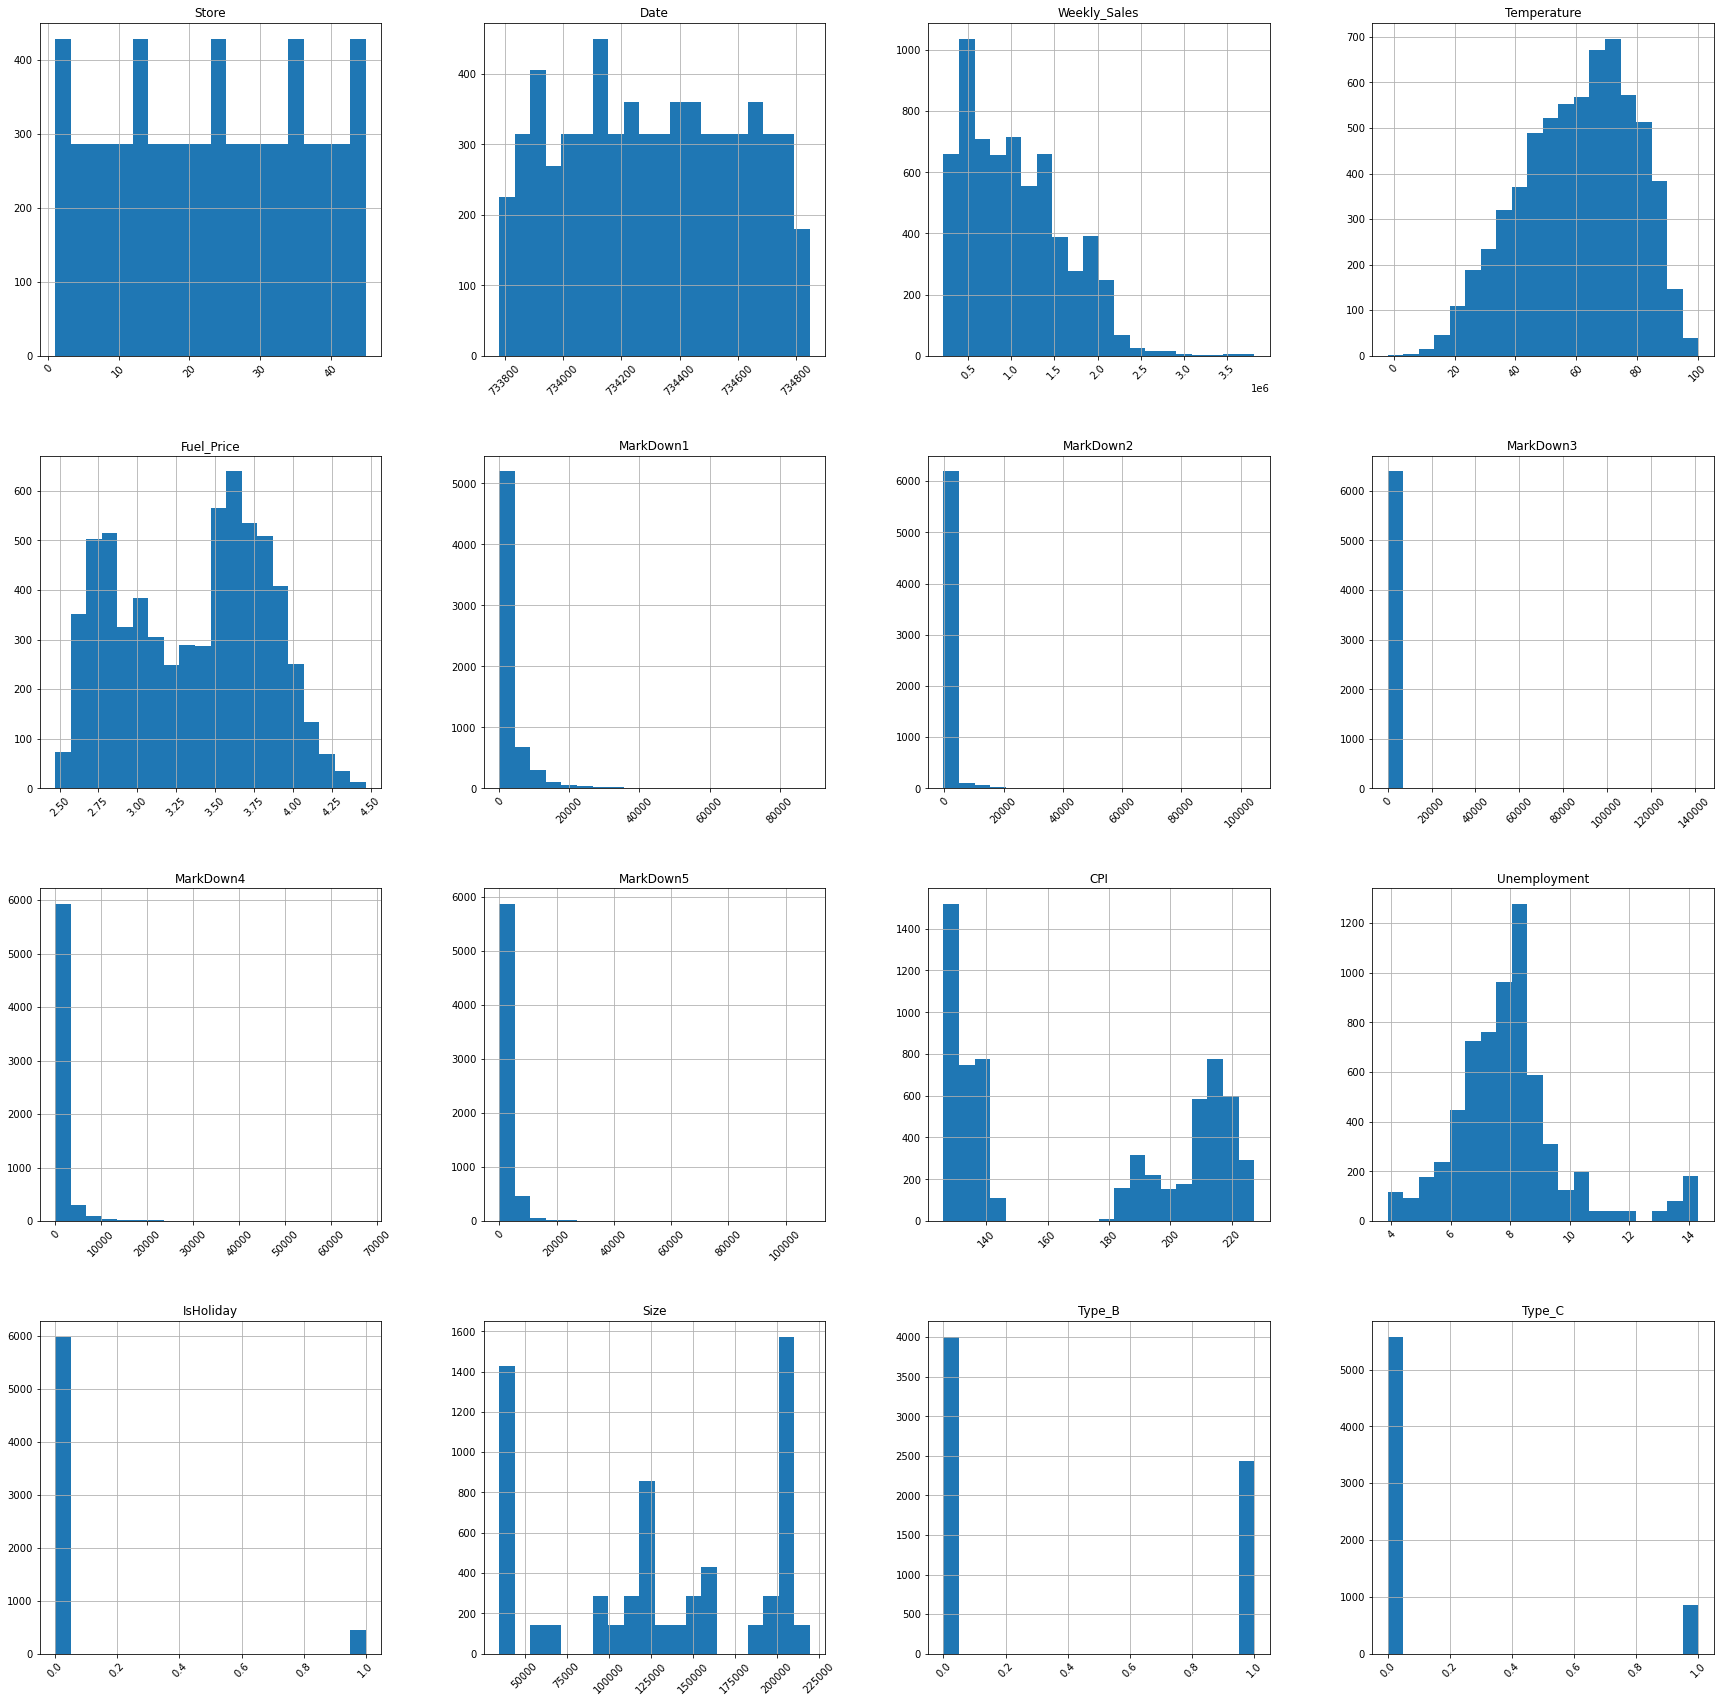

In [16]:
merged_sales.hist(bins=20, figsize=(30,30), xrot=45)

I used the histograms to see if there were any interesting trends in the dataframe values. Temperature and unemployment seem to have a normal distribution while fuel price and CPI have a more bimodal type of distribution. Size does not appear to have any particular trends and every markdown and the weekly sales are right-skewed.

###  Plot the Correlation Matrix Heatmaps<a id='Correlation_Matrix_Heatmaps'></a>

I've removed all the categorical variables for the correlation matrix heatmap below

In [17]:
data_0_cont = merged_sales.drop(columns=['Store', 'Date', 'IsHoliday', 'Type_B', 'Type_C'])

Correlation between continuous features


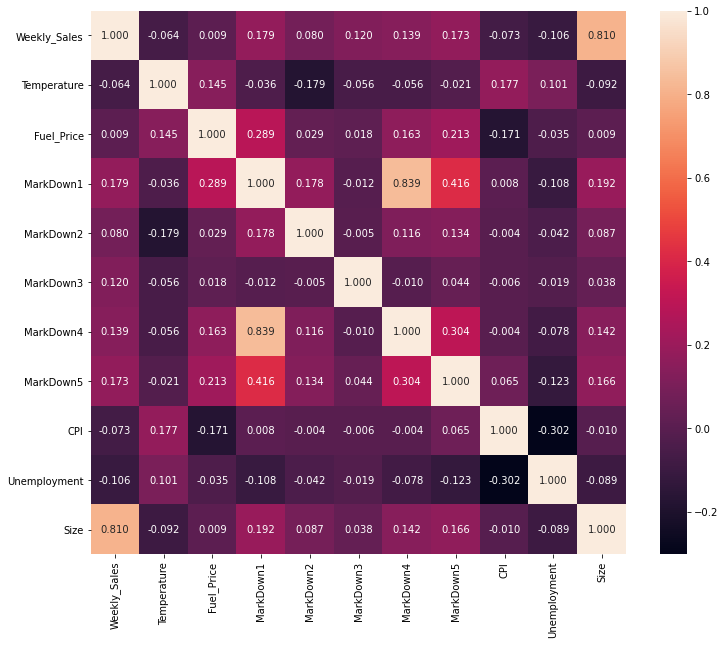

In [18]:
plt.figure(figsize=(12,10))
print('Correlation between continuous features')
p=sns.heatmap(data_0_cont.corr(), annot=True, fmt='.3f')

There seems to be a few interesting correlations occuring as shown on the heat maps. We are interested in correlations with weekly sales, which shows a positive correlation with the size of the store, the markdown columns, and fuel price. All the other features showed negative correlations with weekly sales. Size had the highest positive correlation of 0.810 with the other positive correlation being relatively low, below 0.2. Interestingly, the markdown features had high positive correlations with each other and a few higher positive correlations with fuel price. Unemployment, while having a low correlation, did seem to indiacte that as unemployment falls, sales would rise, which would make sense. The rest of the correlations were either positive or negative but very low.

## Split data into training and test sets<a id='Training_and_Test_Sets'></a>

I'll use the train test split function to split the data for the machine learning modesl. I've used a split of 80/20 training to test samples and a random state of 42 for reproducibility.

In [19]:
#Split the data into training and testing sections
X = merged_sales.drop(columns=['Weekly_Sales'])
y = merged_sales['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the training and testing data<a id='Scale_the_Data'></a>

There are a few common scalers, but I've decided to use the standard scaler and min max scaler methods for the data. I will also export the unscaled data to see how that fits with the models. If I were to go on to create a neural network I would also need to make sure I didn't have any negative values.

In [20]:
SS_scaler = StandardScaler()
MM_scaler = MinMaxScaler()

XtrainSS = SS_scaler.fit_transform(X_train)
XtrainMM = MM_scaler.fit_transform(X_train)

XSS_train = pd.DataFrame(XtrainSS, columns=X.columns)
XMM_train = pd.DataFrame(XtrainMM, columns=X.columns)

In [21]:
XtestSS = SS_scaler.fit_transform(X_test)
XtestMM = MM_scaler.fit_transform(X_test)

XSS_test = pd.DataFrame(XtestSS, columns=X.columns)
XMM_test = pd.DataFrame(XtestMM, columns=X.columns)

In [22]:
y_train = y_train.to_frame().reset_index(drop=True)
y_test = y_test.to_frame().reset_index(drop=True)

In [23]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Models<a id='Models'></a>

### Linear Regression Models<a id='Linear_Regression_Models'></a>

I've created multiple linear regression models based on the scaled and unscaled datasets.

In [24]:
#Linear Regression Model using the Standard Scaler data
regSS = LinearRegression()
regSS.fit(XSS_train, y_train)
ySS_pred = regSS.predict(XSS_test)
ySSt_pred = regSS.predict(XSS_train)

print("R^2: {}".format(r2_score(y_test, ySS_pred)))
rmse = np.sqrt(mean_squared_error(y_test, ySS_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2_score(y_train, ySSt_pred)))

R^2: 0.7149243962083601
Root Mean Squared Error: 307081.13013798697
R^2: 0.7240870835825349


In [25]:
#Linear Regression Model using the Min/Max Scaler data
regMM = LinearRegression()
regMM.fit(XMM_train, y_train)
yMM_pred = regMM.predict(XMM_test)

print("R^2: {}".format(r2_score(y_test, yMM_pred)))
rmse = np.sqrt(mean_squared_error(y_test, yMM_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7105732805247138
Root Mean Squared Error: 309415.7488144238


In [26]:
#Linear regression models with no scaling
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("R^2: {}".format(r2_score(y_test, y_pred)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7148384119194156
Root Mean Squared Error: 307127.4374360723


The best linear regression model was created with the standard scaler data, so I will create a scatter plot of the predicted versus actual values over time with this model to see how well the data matches up.

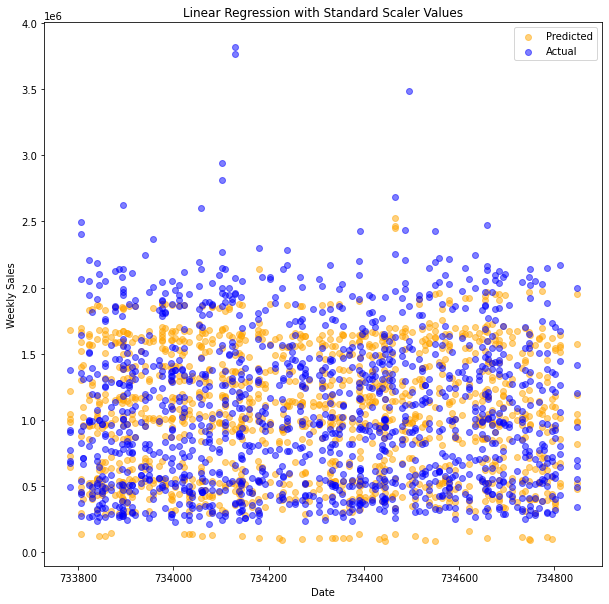

In [27]:
#Scatter plot of Linear Regression with Standard Scaled Values
plt.figure(figsize=(10,10))
plt.title('Linear Regression with Standard Scaler Values')
pred = plt.scatter(X_test['Date'], ySS_pred, color ="orange", alpha=0.5)
act = plt.scatter(X_test['Date'], y_test, color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend((pred, act),
           ('Predicted', 'Actual'),
           scatterpoints=1,
           loc='upper right')
plt.show()

The predicted values seem to do okay with the middle data, but not with the high and low actual values. I'll look at using a random forest model to try and improve the predictive power.

I'll take a chance to also look at Lasso and Ridge regression using the standard scaled data.

In [28]:
#Ridge Regression
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(XSS_train, y_train)
ridge_pred = ridge.predict(XSS_test)
ridge.score(XSS_test, y_test)

0.7035365003657654

In [29]:
#Lasso Regression
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(XSS_train, y_train)
lasso_pred = lasso.predict(XSS_test)
lasso.score(XSS_test, y_test)

0.714925304305043

Next, I wanted to see if I could use lasso coefficients to determine which features were the most important for the regression.

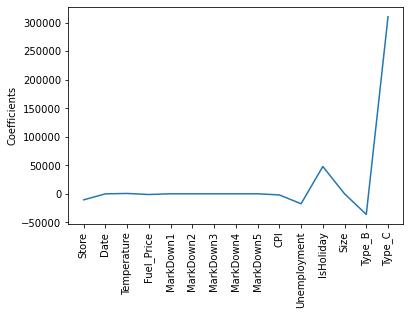

In [30]:
#Select the most important features of the dataset
names = merged_sales.drop('Weekly_Sales', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show()

In [31]:
XSS = XSS_train.append(XSS_test, ignore_index = True)

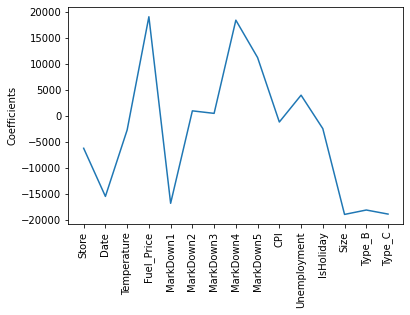

In [32]:
#Select the most important features of the dataset
names = merged_sales.drop('Weekly_Sales', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(XSS, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')
plt.show()

I may need to revisit these coefficient calculations as they don't seem to correlate at all with the correlation matrix.

In [33]:
#Cross validate the chosen model
XSS = SS_scaler.fit_transform(X)

#Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(regSS, XSS, y, cv=5)

#Print the 5-fold cross-validation scores
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.69948213 0.49065171 0.44654117 0.62704804 0.48658218]
Average 5-Fold CV Score: 0.5500610464986282


The 5 fold cross validation didn't seem to show any better regression values than the linear regression models. Next, I'll use the random forest regessor to look at the data.

### Random Forest Models<a id='Random_Forest_Models'></a>

I'll now use a random forest model with each of the differently scaled data, as well as the unscaled data.

In [34]:
#Random Forest with Standard Scaler
regressorSS = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressorSS.fit(XSS_train, y_train.values.ravel())
ySSf_pred = regressorSS.predict(XSS_test)

print('MAE: ', mean_absolute_error(y_test, ySSf_pred))
print('MSE: ', mean_squared_error(y_test, ySSf_pred))
print("R^2: {}".format(r2_score(y_test, ySSf_pred)))

MAE:  89974.51172292151
MSE:  29900952955.246456
R^2: 0.9096061629015456


In [35]:
#Random Forest with Min Max Scaler
regressorMM = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressorMM.fit(XMM_train, y_train.values.ravel())
yMMf_pred = regressorMM.predict(XMM_test)

print('MAE: ', mean_absolute_error(y_test, yMMf_pred))
print('MSE: ', mean_squared_error(y_test, yMMf_pred))
print("R^2: {}".format(r2_score(y_test, yMMf_pred)))

MAE:  73371.71592626262
MSE:  19127264149.021275
R^2: 0.9421761974538552


In [36]:
#Random Forest with no scalers
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train, y_train.values.ravel())
yf_pred = regressor.predict(X_test)
yft_pred = regressor.predict(X_train)

print('MAE: ', mean_absolute_error(y_test, yf_pred))
print('MSE: ', mean_squared_error(y_test, yf_pred))
print("R^2: {}".format(r2_score(y_test, yf_pred)))
print("R^2: {}".format(r2_score(y_train, yft_pred)))

MAE:  68369.52447156179
MSE:  16579045371.140472
R^2: 0.9498797403290185
R^2: 0.9932844090725057


So far, the best model with the random forest with the unscaled values. I'll create a scatter plot of the predicted versus actual values from this model over time to see how the data matches up.

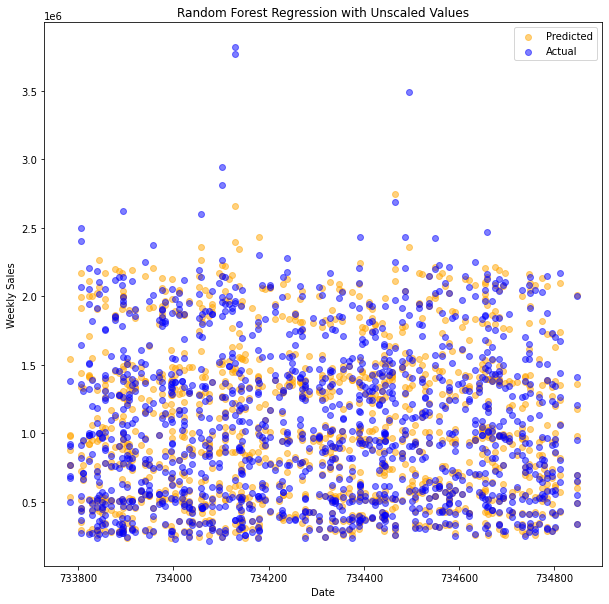

In [37]:
#Scatter plot of Random Forest Regression with Unscaled Values
plt.figure(figsize=(10,10))
plt.title('Random Forest Regression with Unscaled Values')
pred = plt.scatter(X_test['Date'], yf_pred, color ="orange", alpha=0.5)
act = plt.scatter(X_test['Date'], y_test, color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend((pred, act),
           ('Predicted', 'Actual'),
           scatterpoints=1,
           loc='upper right')
plt.show()

The predicted values seem to be much better using the random forest regression model with the unscaled values than with any of the linear regression models. Both the minimum and maximum values look well predicted. I'll go through some hyperparameter tuning now to see if this model is overfitting any of the data.

### Random Forest Hyperparameter Tuning<a id='Random_Forest_Hyperparameter_Tuning'></a>

In [38]:
#Test Hyperparamters of Random Forest Regression
n_estimators = [int(i) for i in np.linspace(start = 10, stop = 150, num = 15)]
max_depth = [None, 2, 3, 4, 5, 6]
min_samples_split = [2, 3, 4, 5, 6]
min_samples_leaf = [1, 2, 3, 4, 5]
max_features = ['auto', 'sqrt', 'log2']
random_state = [None, 42]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_features': max_features, 'random_state': random_state, 'bootstrap':bootstrap}

In [39]:
RF_Model = RandomForestRegressor()

In [40]:
RF_RandomGrid = RandomizedSearchCV(estimator = RF_Model, param_distributions = param_grid, cv = 10, verbose = 2, n_jobs = 4)
RF_RandomGrid.fit(X_train, y_train.values.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 2, 3, 4, 5, 6],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150],
                                        'random_state': [None, 42]},
                   verbose=2)

In [41]:
RF_RandomGrid.best_params_

{'random_state': 42,
 'n_estimators': 80,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [42]:
print(f'Train Accuracy: {RF_RandomGrid.score(X_train, y_train.values.ravel()):.3f}')
print(f'Test Accuracy: {RF_RandomGrid.score(X_test, y_test.values.ravel()):.3f}')

Train Accuracy: 0.988
Test Accuracy: 0.927


In [43]:
#Random Forest with no scalers and best parameters
regressor2 = RandomForestRegressor(n_estimators = 120, min_samples_split = 6, min_samples_leaf = 4, max_features = 'log2', max_depth = None, bootstrap = False, random_state = 42)
regressor2.fit(X_train, y_train.values.ravel())
yf_pred2 = regressor2.predict(X_test)
yft_pred2 = regressor2.predict(X_train)

print('MAE: ', mean_absolute_error(y_test, yf_pred2))
print('MSE: ', mean_squared_error(y_test, yf_pred2))
print("R^2: {}".format(r2_score(y_test, yf_pred2)))
print("R^2: {}".format(r2_score(y_train, yft_pred2)))

MAE:  73285.41555620436
MSE:  17934364873.157665
R^2: 0.9457824618755502
R^2: 0.9793147195486646


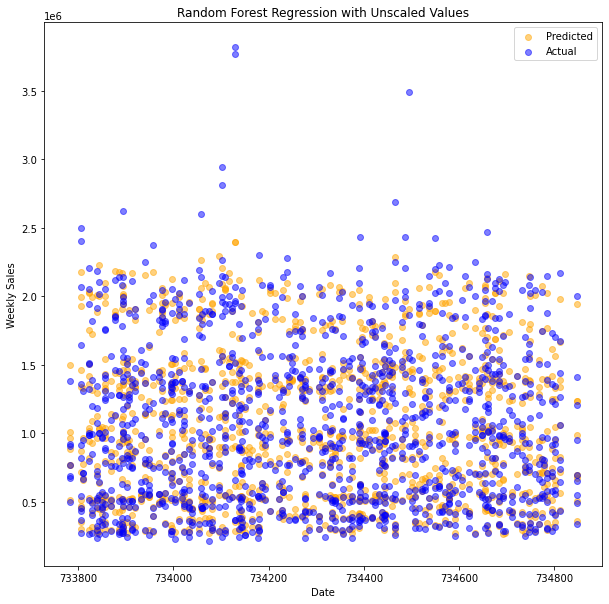

In [44]:
#Scatter plot of Random Forest Regression with Unscaled Values and Best Parameters
plt.figure(figsize=(10,10))
plt.title('Random Forest Regression with Unscaled Values')
pred = plt.scatter(X_test['Date'], yf_pred2, color ="orange", alpha=0.5)
act = plt.scatter(X_test['Date'], y_test, color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend((pred, act),
           ('Predicted', 'Actual'),
           scatterpoints=1,
           loc='upper right')
plt.show()

Visually, it's hard to tell the difference between the model with the best parameters and the previous random forest scatter plot. This makes sense as the hyperparameter tuning actually showed a worse fitting regression using the calculated best parameters than with the orginal model.

Below, I've looked at which features from the random forest regressor were the most important for the regression.

<AxesSubplot:title={'center':'Feature Importance of Updated Model'}, xlabel='Features'>

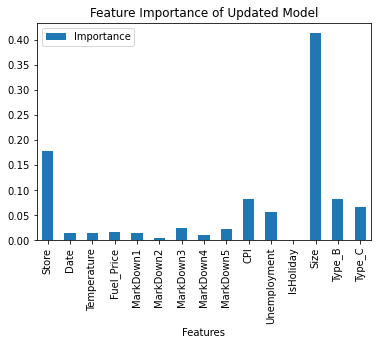

In [45]:
#Determine which features are the most important from the updated random forest regression model
FL = list(zip(X_train.columns, regressor2.feature_importances_))
df = pd.DataFrame(FL, columns=['Features', 'Importance'])
df.plot.bar(x='Features', y='Importance', rot=90, title='Feature Importance of Updated Model')

According to the best parameters regressor, the most important features in this regression are the store and size of store, and possibly CPI, unemployment, and the type of store.

<AxesSubplot:title={'center':'Feature Importance of Original Model'}, xlabel='Features'>

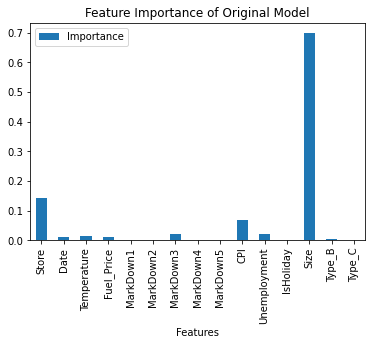

In [46]:
#Determine which features are the most important from the updated random forest regression model
FLO = list(zip(X_train.columns, regressor.feature_importances_))
df = pd.DataFrame(FLO, columns=['Features', 'Importance'])
df.plot.bar(x='Features', y='Importance', rot=90, title='Feature Importance of Original Model')

Looking back at the original best random forest model, the most important features for the regression model appear to be store and the store size.

### Elastic Net Models<a id='Elastic_Net_Models'></a>

The final model I'll look at is the ElasticNet. I'll use ElasticNet and ElasticNetCV and see if either model can produce better results than random forest regressor. First, I'll see if I can determine which alpha parameter works best for the elastic net model.

In [47]:
#ElasticNet
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]
for a in alphas:
    model = ElasticNet(alpha=a).fit(X,y)   
    score = model.score(X, y)
    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.72, MSE:88422265724.43, RMSE:297358.82
Alpha:0.0010, R2:0.72, MSE:88422786463.06, RMSE:297359.69
Alpha:0.0100, R2:0.72, MSE:88464621905.26, RMSE:297430.03
Alpha:0.1000, R2:0.72, MSE:89540536513.89, RMSE:299233.25
Alpha:0.3000, R2:0.71, MSE:91145140031.07, RMSE:301902.53
Alpha:0.5000, R2:0.71, MSE:92095014182.61, RMSE:303471.60
Alpha:0.7000, R2:0.71, MSE:92737304329.65, RMSE:304528.00
Alpha:1.0000, R2:0.71, MSE:93390001920.52, RMSE:305597.78


This seems to show that an alpha of 0.1 is the best alpha value to use.

In [48]:
elastic=ElasticNet(alpha=0.01).fit(X_train, y_train)
ye_pred = elastic.predict(X_test)
scoree = elastic.score(X_test, y_test)
msee = mean_squared_error(y_test, ye_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoree, msee, np.sqrt(msee)))

R2:0.715, MSE:94305521384.80, RMSE:307092.04


In [49]:
elastic_cv=ElasticNetCV(alphas=alphas, cv=5)
modelE = elastic_cv.fit(X_train, y_train.values.ravel())
print(modelE.alpha_)
print(modelE.intercept_)

yE_pred = modelE.predict(X_test)
scoreE = modelE.score(X_test, y_test)
mseE = mean_squared_error(y_test, yE_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoreE, mseE, np.sqrt(mseE)))

0.001
43345762.862336814
R2:0.715, MSE:94320010800.91, RMSE:307115.63


In [50]:
elasticSS=ElasticNet(alpha=0.01).fit(XSS_train, y_train)
yeSS_pred = elasticSS.predict(XSS_test)
scoreeSS = elasticSS.score(XSS_test, y_test)
mseeSS = mean_squared_error(y_test, yeSS_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoreeSS, mseeSS, np.sqrt(mseeSS)))

R2:0.715, MSE:94271907234.60, RMSE:307037.31


In [51]:
elasticSS_cv=ElasticNetCV(alphas=alphas, cv=5)
modelESS = elasticSS_cv.fit(XSS_train, y_train.values.ravel())
print(modelESS.alpha_)
print(modelESS.intercept_)

yESS_pred = modelESS.predict(XSS_test)
scoreESS = modelESS.score(XSS_test, y_test)
mseESS = mean_squared_error(y_test, yESS_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoreESS, mseESS, np.sqrt(mseESS)))

0.001
1044112.8771678298
R2:0.715, MSE:94293855394.49, RMSE:307073.05


In [52]:
elasticMM=ElasticNet(alpha=0.01).fit(XMM_train, y_train)
yeMM_pred = elasticMM.predict(XMM_test)
scoreeMM = elasticMM.score(XMM_test, y_test)
mseeMM = mean_squared_error(y_test, yeMM_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoreeMM, mseeMM, np.sqrt(mseeMM)))

R2:0.711, MSE:95586430332.17, RMSE:309170.55


In [53]:
elasticMM_cv=ElasticNetCV(alphas=alphas, cv=5)
modelEMM = elasticMM_cv.fit(XMM_train, y_train.values.ravel())
print(modelEMM.alpha_)
print(modelEMM.intercept_)

yEMM_pred = modelEMM.predict(XMM_test)
scoreEMM = modelEMM.score(XMM_test, y_test)
mseEMM = mean_squared_error(y_test, yEMM_pred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(scoreEMM, mseEMM, np.sqrt(mseEMM)))

0.0001
670185.1043826872
R2:0.711, MSE:95457873644.05, RMSE:308962.58


The best model from the above seemed to be the ElasticNetCV using standard scaler values. Below, I'll plot the predicted and actual values using this model.

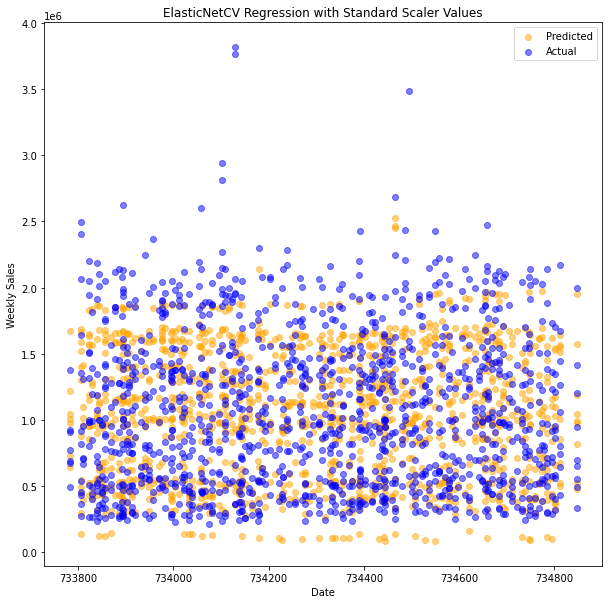

In [54]:
#Scatter plot of ElasticNetCV regression with standard scaler values
plt.figure(figsize=(10,10))
plt.title('ElasticNetCV Regression with Standard Scaler Values')
pred = plt.scatter(X_test['Date'], yESS_pred, color ="orange", alpha=0.5)
act = plt.scatter(X_test['Date'], y_test, color='blue', alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend((pred, act),
           ('Predicted', 'Actual'),
           scatterpoints=1,
           loc='upper right')
plt.show()

The fit between actual and predicted values using the ElasticNetCV isn't as good as the random forst model. Most of the predicted values have a much tighter spread and lower value than the actual values.

## Summary<a id='Summary'></a>

In summary, combining the weekly sales for each department per store and date provided the best regression analysis results. Looking back over the different regression models used in this analysis, the random forest regressor using the unscaled feature values provided the best fit model overall. Both the spread and value of the predicted values was very close to the actual target values themselves. I would thus be inclined to rely on this model when needing to predict future sales based on estimated feauture values. As more data is fit to this model, we should be able to better predict what future sales this company will see from their stores.